In [1]:
!pip install jupysql duckdb-engine

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
DEPRECATION: The HTML index page being used (https://mirrors.aliyun.com/pypi/simple/duckdb-engine/) is not a proper HTML 5 document. This is in violation of PEP 503 which requires these pages to be well-formed HTML 5 documents. Please reach out to the owners of this index page, and ask them to update this index page to a valid HTML 5 document. pip 22.2 will enforce this behaviour change. Discussion can be found at https://github.com/pypa/pip/issues/10825
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 KB 3.0 MB/s eta 0:00:00
DEPRECATION: The HTML index page being used (https://mirrors.aliyun.com/pypi/simple/duckdb/) is not a proper HTML 5 document. This is in violation of PEP 503 which requires these pages to be well-formed HTML 5 documents. Please reach out to the owners of this index page, and ask them to update this index page to a valid HT

In [1]:
%load_ext sql
%sql duckdb://

from pathlib import Path
from urllib.request import urlretrieve

#curr = Path()
#print(curr.as_uri, curr.absolute())
#f = Path("data/penguins.csv")
#print('isFile:',f.is_file(), f.absolute())

if not Path("data/penguins.csv").is_file():
    urlretrieve(
        "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv",
        "penguins.csv",
    )
%sql SELECT * FROM 'data/penguins.csv' LIMIT 3


Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE


In [3]:
%%sql
SELECT *
FROM 'data/penguins.csv'
WHERE bill_length_mm > 40
LIMIT 3

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
Adelie,Torgersen,42.0,20.2,190,4250,None
Adelie,Torgersen,41.1,17.6,182,3200,FEMALE


In [9]:
%%sql --save not_nulls --no-execute
SELECT *
FROM 'data/penguins.csv'
WHERE bill_length_mm IS NOT NULL
AND bill_depth_mm IS NOT NULL

Running query in 'duckdb://'

Skipping execution...

Switching to connection duckdb://

ProgrammingError: (duckdb.InvalidInputException) Invalid Input Error: Attempting to execute an unsuccessful or closed pending query result
Error: Invalid Error: Current transaction is aborted (please ROLLBACK)
[SQL: WITH not_nulls AS (
SELECT *
FROM 'data/penguins.csv'
WHERE bill_length_mm IS NOT NULL
AND bill_depth_mm IS NOT NULL)
SELECT
    MIN("bill_length_mm"),
    MAX("bill_length_mm")
FROM "not_nulls"]
(Background on this error at: https://sqlalche.me/e/20/f405)

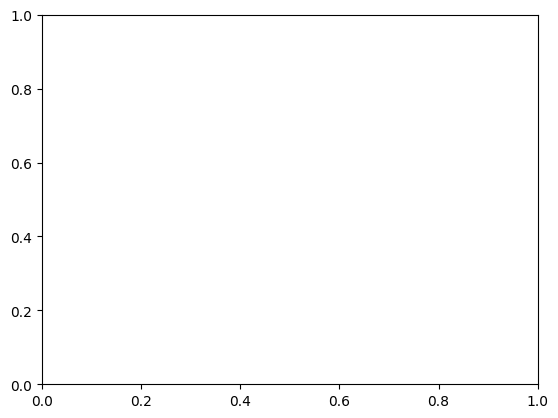

In [10]:
%sql duckdb://
%sqlplot histogram --column bill_length_mm bill_depth_mm --table not_nulls --with not_nulls